# Laboratorium nr 4 - Producenci i konsumenci - ciekawe warianty

## 2. Producenci i konsumenci z losową iloscią pobieranych i wstawianych porcji. <br> Porównanie średnich czasów oczekiwania.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Testy zostały przeprowadzone dla następujących wielkości bufora (buffer_size) i liczby procesów poszczególnych typów (P = K = thread_count):

In [2]:
buffer_sizes = [1_000, 10_000, 100_000]
thread_counts = [10, 100, 1000]

* odczyt wyników z pliku

In [3]:
data_naive = {buffer_size: {} for buffer_size in buffer_sizes}
data_fair = {buffer_size: {} for buffer_size in buffer_sizes}

for buffer_size in buffer_sizes:
    for thread_count in thread_counts:

        producer_data = pd.read_csv(f'results/n-{buffer_size}-{thread_count}-{thread_count}-consumers.csv', 
                                    header=None,
                                    names=['consumers'], 
                                    index_col=0).sort_index()

        consumer_data = pd.read_csv(f'results/n-{buffer_size}-{thread_count}-{thread_count}-producers.csv', 
                                    header=None, 
                                    names=['producers'], 
                                    index_col=0).sort_index()

        data_naive[buffer_size][thread_count] = pd.concat([producer_data, consumer_data], axis=1)

        producer_data = pd.read_csv(f'results/f-{buffer_size}-{thread_count}-{thread_count}-consumers.csv', 
                                    header=None,
                                    names=['consumers'], 
                                    index_col=0).sort_index()

        consumer_data = pd.read_csv(f'results/f-{buffer_size}-{thread_count}-{thread_count}-producers.csv', 
                                    header=None, 
                                    names=['producers'], 
                                    index_col=0).sort_index()

        data_fair[buffer_size][thread_count] = pd.concat([producer_data, consumer_data], axis=1)


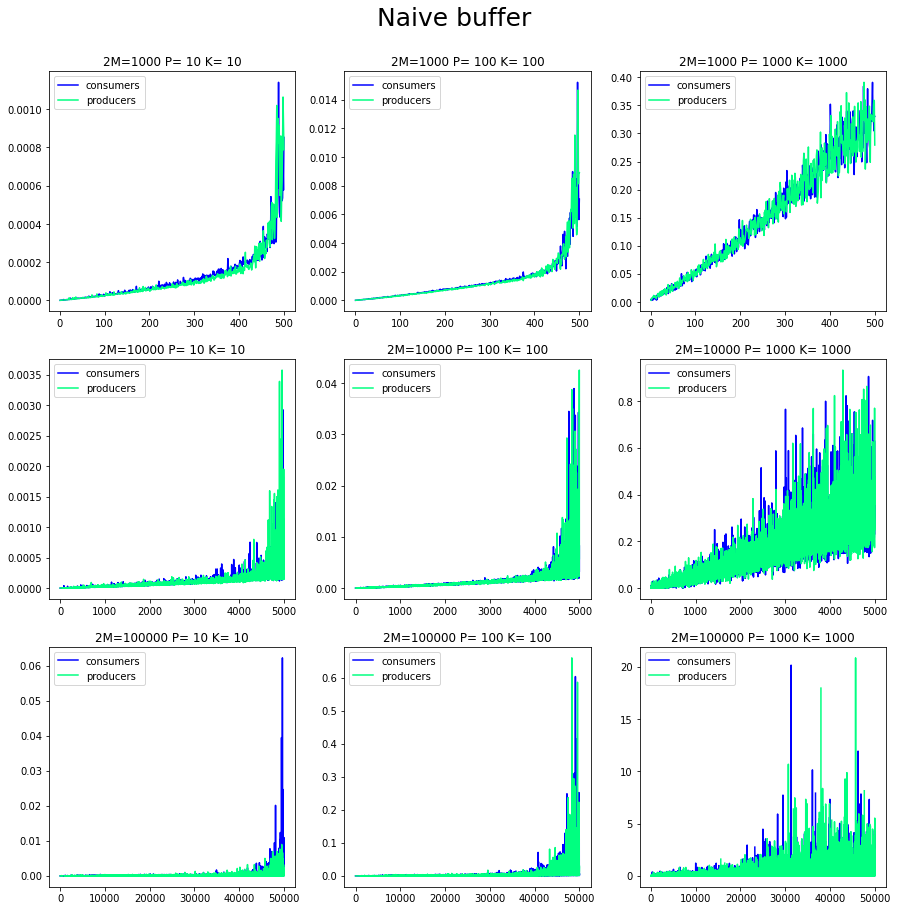

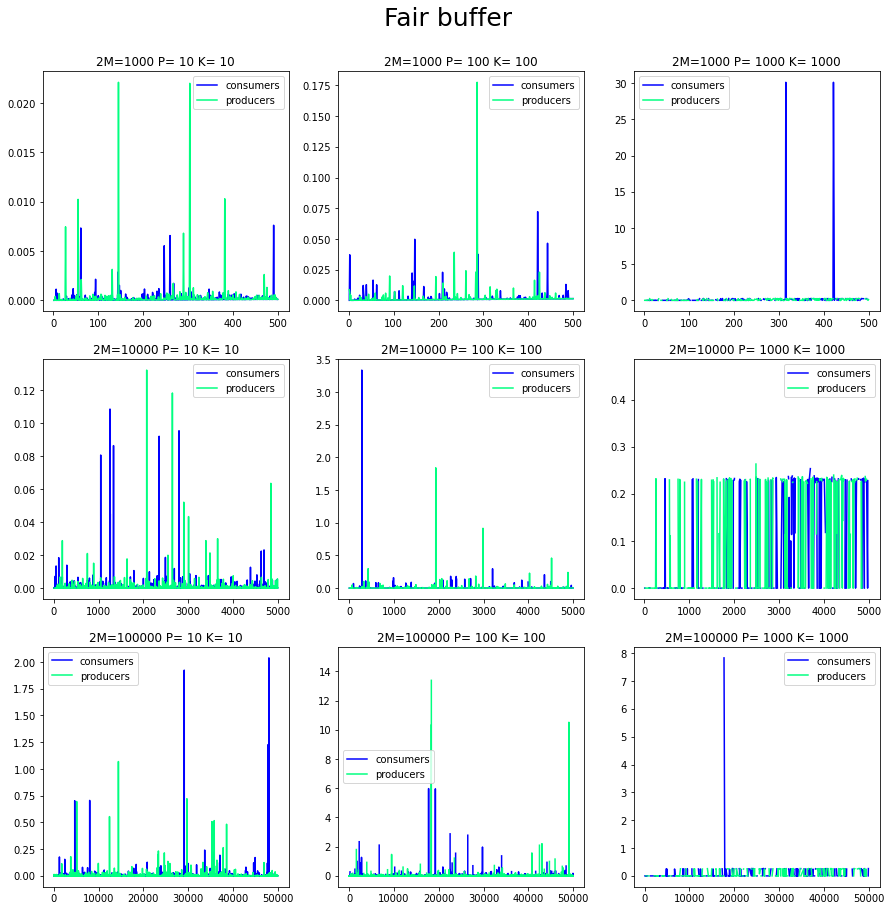

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Naive buffer', fontsize=25, y=0.94)

for i, buffer_size in enumerate(buffer_sizes):
    for j, thread_count in enumerate(thread_counts):
        data_naive[buffer_size][thread_count].plot(
            ax=ax[i][j],
            title=f'2M={buffer_size} P= {thread_count} K= {thread_count}',
            colormap='winter'
        )

plt.show()

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Fair buffer', fontsize=25, y=0.94)

for i, buffer_size in enumerate(buffer_sizes):
    for j, thread_count in enumerate(thread_counts):
        data_fair[buffer_size][thread_count].plot(
            ax=ax[i][j],
            title=f'2M={buffer_size} P= {thread_count} K= {thread_count}',
            colormap = 'winter'
        )

plt.show()
        

W przypadku naiwnej implementacji bufora, procesy wstawiające/pobierające dużą liczbę elementów statystycznie czekają dłużej niż te operujące na małej liczbie. W przypadku drugiej implementacji nie obserwujemy tego zjawiska. Większość procesów oczekuje podobny czas, oprócz pojedynczych przypadków dłuższego oczekiwania, które jednak nie zależy od liczby wstawianych/pobieranych elementów.

M. Hawryluk, 2021